  ###  About Project:  Used cars price predictions

#### Importing Packages

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Importing Datset

In [3]:
df = pd.read_csv("F:\Analytix Lab\My classes\Machine_Learning\My_Project\Kaggle_Vehicle\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking Cardinality of Variables
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
# Checking missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Removing Car_Name variable
df = df.iloc[:,1:]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# Creating a new variable with values of Car age (In Years)
df['car_age'] = 2023 - df['Year']
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [10]:
#Removing Year Column
df = df.iloc[:,1:]
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [11]:
# Creating Dummy variables for Categorical variables(Fuel_Type, Seller_Type and Transmission)
df_final = pd.get_dummies(df, drop_first=True)
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [12]:
df_final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


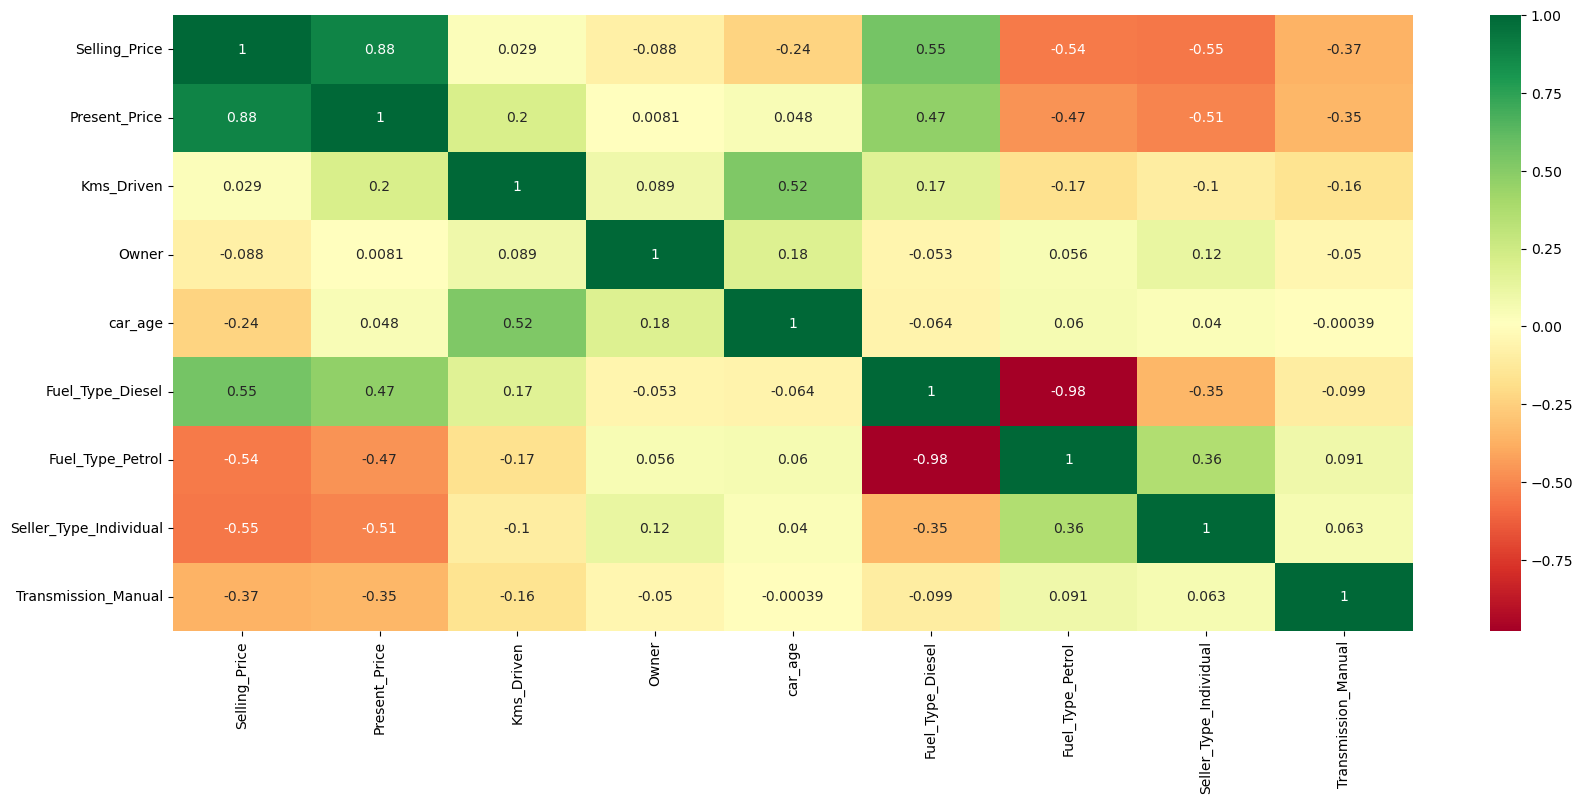

In [13]:
# Plotting Heatmap for checking Co relation among independent variables
plt.figure(figsize=(20,8))
sns.heatmap(df_final.corr(), annot=True, cmap = 'RdYlGn')
plt.show()

In [14]:
# Splitting into X and y variables
X = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [15]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
model.feature_importances_

array([0.35624999, 0.04253247, 0.0009166 , 0.07587571, 0.24195346,
       0.01298014, 0.1283865 , 0.14110513])

<AxesSubplot:>

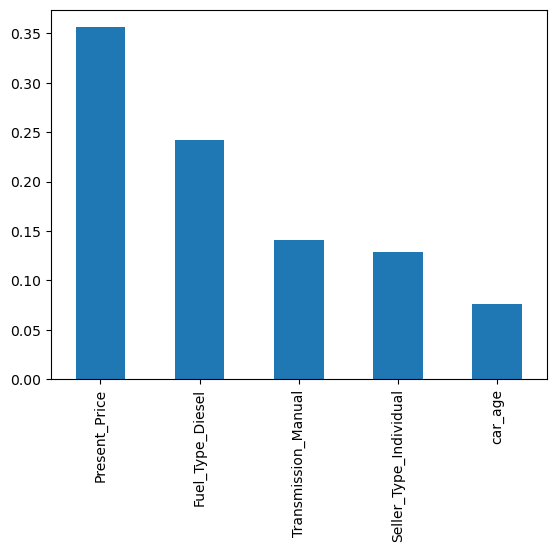

In [17]:
# Getting the Top 5 Important features
pd.Series(model.feature_importances_, index=X.columns).nlargest(5).plot(kind = 'bar')

In [20]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [23]:
random_f = RandomForestRegressor()

#### Hypertuning Parameters

In [24]:
# Number of trees in random forest
n_estimators = [i for i in np.arange(100,1201,100)]

# No of features to consider before split
max_features = ['auto','sqrt']

# Min no of samples required at each leaf node
max_leaf_nodes = [1,2,5,10]

# Min Sample split
min_samples_split = [2,5,10,15,100]

# Max level in trees
max_depth = [int(i) for i in np.linspace(5,30, num=6)]

In [27]:
parameters = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_leaf_nodes':max_leaf_nodes,
              'min_samples_split' : min_samples_split,
              'max_depth' : max_depth
             }

In [29]:
model_0 = RandomizedSearchCV( random_f, param_distributions = parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')

In [30]:
model_0.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=1)

In [31]:
# Predictions on X_train and on y_test
y_train_pred = model_0.predict(X_train)
y_test_pred = model_0.predict(X_test)


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

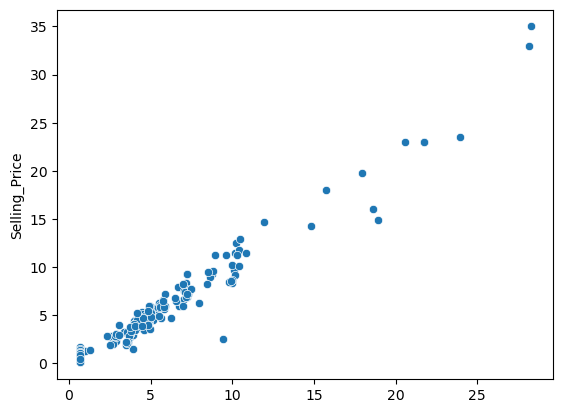

In [32]:
sns.scatterplot(y_train_pred, y_train)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

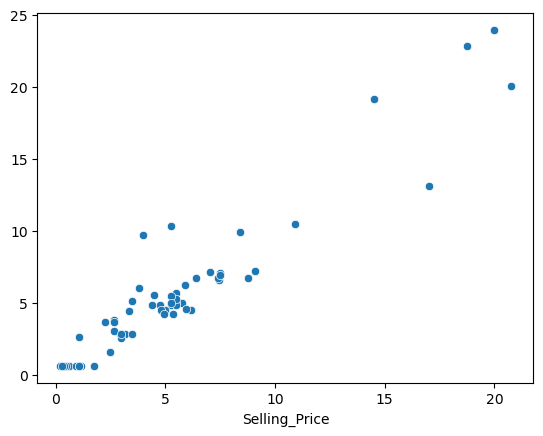

In [33]:
sns.scatterplot(y_test, y_test_pred)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

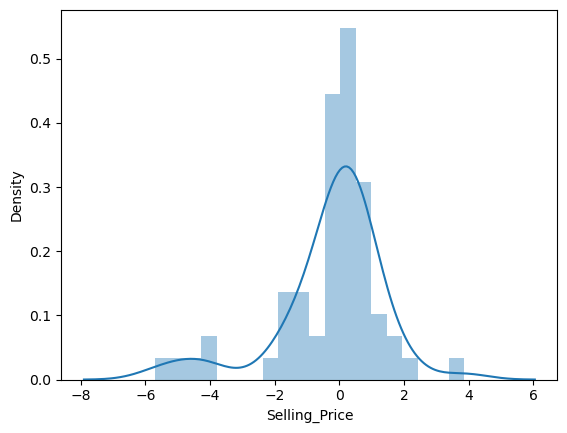

In [34]:
sns.distplot(y_test - y_test_pred)

In [35]:
print( "R2 score for train data: ", r2_score(y_train, y_train_pred))
print( "R2 score for test data: ",  r2_score(y_test, y_test_pred)) 

R2 score for train data:  0.9570363130466937
R2 score for test data:  0.8689169396418892
